# Supernovae Ia as standard candles
## 1 Scientific background
At the end of their lives, the most massive stars undergo a sudden collapse which leads to an explosion which can outshine entire galaxies, a supernova. Supernovae (SNe) are among the most powerful events in our universe. They release extreme amounts of energy as well as heavy elements which likely only form during SNe get ejected into space, enriching the ISM and creating building blocks for the formation of new stars.
SNe are divided into Type I and Type II. The difference between them is the abscence of hydrogen (H) lines in the spectra of Type I SNe whereas Type II SNe contain obvious H lines. [2]

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Comparative_supernova_type_light_curves.png?20120604155323">

https://commons.wikimedia.org/wiki/File:Comparative_supernova_type_light_curves.png

## Standard candles
Astronomy is restricted to mostly studying objects from afar. For the most part this means astronomers can only observe the light an object gives them. An important question when you discover something is: "How far away is it?" And when the distances get so high that parallaxes are no longer of use it is up to the light to answer this question. And here standard candles come to benefit. Standard candles are astronomical objects which emit light with a known luminosity. And with this information you only have to measure the apparent luminosity, put it in the distance modulus formula and solve for $d$.

$m-M=5\cdot\log_{10} (d) -5$

where:
- $m$ is the apparent magnitude,
- $M$ is the absolute magnitude,
- $d$ is the distance to the object in parsecs.

An example for standard candles are cepheids which are pulsating stars that change their brightness with a well-defined stable period and amplitude. But at larger distances it is harder to make out single stars inside a galaxy and it demands brighter objects. SNe Ia are such objects. With typical peak luminosities of about $M_{B} = -19.5 \text{mag}$ they can outshine galaxies. [2]

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/typeia1.jpg">

https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova

### How is data collected?
High-quality data collection on Type Ia supernovae (SNe Ia) began with the Calán/Tololo survey in the 1990s, led by Mario Hamuy and colleagues. This foundational survey provided the first systematic dataset for 29 nearby SNe Ia, using CCD photometry to measure light curves and distances up to redshifts of 0.1. Currently, the Harvard-Smithsonian Center for Astrophysics (CfA) manages one of the largest ongoing SNe Ia campaigns at the Fred Lawrence Whipple Observatory (FLWO), where high-quality, multicolor photometric and spectroscopic data have been collected since 1993, expanding the dataset of nearby SNe Ia.

The CfA program relies on a network of amateur and professional astronomers for new SNe discoveries, receiving notifications coordinated by the IAU’s Central Bureau for Astronomical Telegrams. Once a supernova is confirmed and classified, the CfA team conducts follow-up photometry using CCD detectors, tracking each SNe’s brightness over time in multiple passbands (UBVRI) to create light curves. Observations are made over several weeks, covering each supernova’s peak and decline to produce data for accurate distance measurements. Data processing involves photometric calibration, background, and galaxy subtraction to ensure precise light isolation. [1]

### exemplary UBVRI light curves

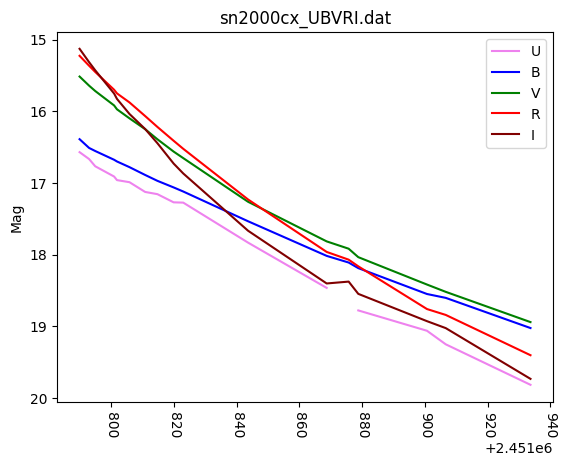

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
#from astropy.time import Time  # suddenly does not recognize astropy

file= "sn2000cx_UBVRI.dat"
df= pd.read_table( file, comment="#", sep="[ ]+", engine="python", header=0, names=["HJD","U","Uerr","B","Berr","V","Verr","R","Rerr","I","Ierr"] )
df[df == 99.999]= float( "NaN" )

"""for i in df["HJD"].index:
  df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]"""

for filter, color in [["U","violet"],["B","blue"],["V","green"],["R","red"],["I","#800000"]]:
  plt.plot( df["HJD"].values, df[filter].values, label=filter, color=color )
plt.title( file )
#plt.xlabel( "HJD" )
plt.ylabel( "Mag" )
plt.legend()
plt.xticks( rotation=270 )
plt.gca().invert_yaxis()
plt.show()


### Supernovae Type Ia
SNe Ia are characterized by a strong ionized silicon absorbtion in their spectra. A large fraction of observed SNe Ia (∼ 70%) is found to show remarkable homogeneity and a clear empirical relationship between light curve width and peak luminosity, the so-called "Phillips relation". These SNe Ia are commonly referred to as "normal SNe Ia" and have been used to determine cosmological parameters, which has led to the discovery of the accelerating expansion of the universe.
Sne Ia are widely thought to be thermonuclear explosions of white dwarfs in binary systems. However, there is no agreement on the fundamental aspects of the nature of the progenitor systems (i.e. the stars from which SNe Ia arise) and their explosion mechanism neither from theoretical nor observational side. [2]

<img src="https://www.schoolsobservatory.org/sites/default/files/discover/supernovaeproject/Type%20Ia.jpg">

https://www.schoolsobservatory.org/learn/astro/stars/cycle/ia_supernova

## 2 Data Distributions

### Plot of all the SNe light curves

To get an overview of what's going on, we plotted out all data files that contained values of the apparent luminosity for all five filters (U,B,V,R,I) and with at least 20 observations. Since the data files contained error margins for the values of the light intensities, we made them visible with error bars.

The error bars show that the measurements were not taken at regular intervals. In some cases, the intervals are greater than 100 days, making them difficult to compare.

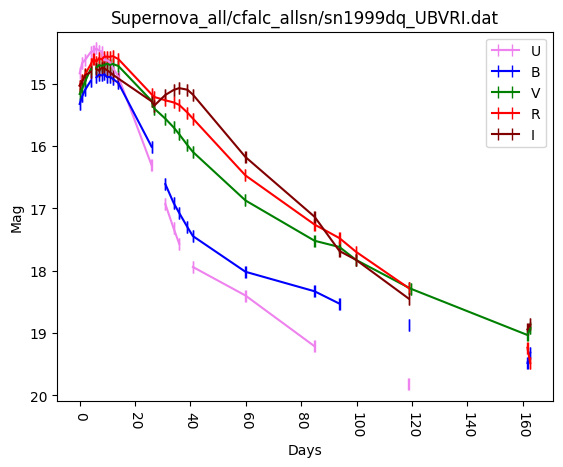

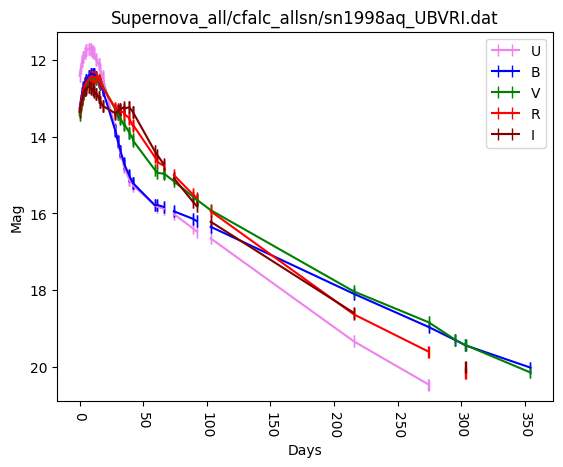

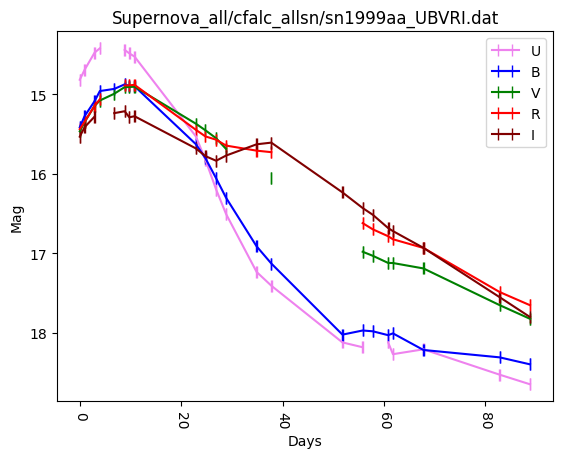

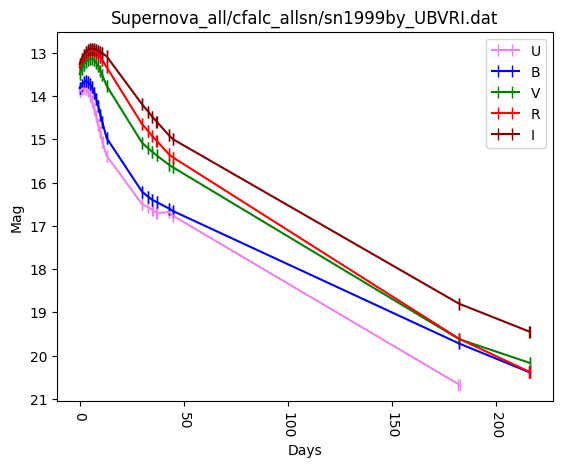

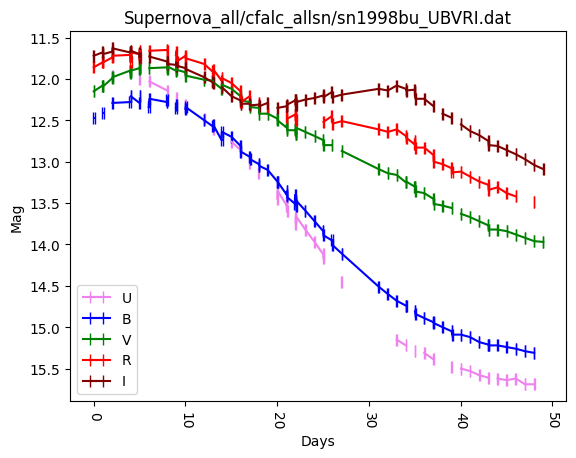

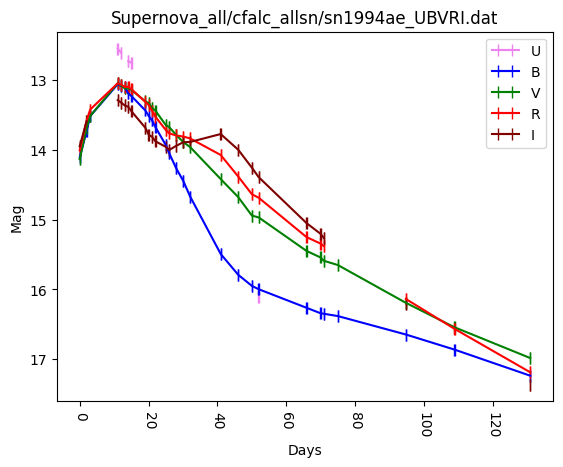

In [158]:
import glob

dataset = glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat")

for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")

            '''
            # Adjust HJD if it's smaller than 2450000
            if df["HJD"].iat[0] < 2450000:
                df["HJD"] += 2450000

            for i in df["HJD"].index:
                df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]
            '''

            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]
            
            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

            plt.title(file)
            plt.xlabel("Days")
            plt.ylabel("Mag")
            plt.xticks(rotation=270)
            plt.legend()
            plt.gca().invert_yaxis()

            # Show the plot (or save it with plt.savefig("filename.png") if preferred)
            plt.show()
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")


## All SNe in a single plot for each filter
Now we made a plot containing every SNe lightcurve for each filter, starting at the point of peak luminosity.

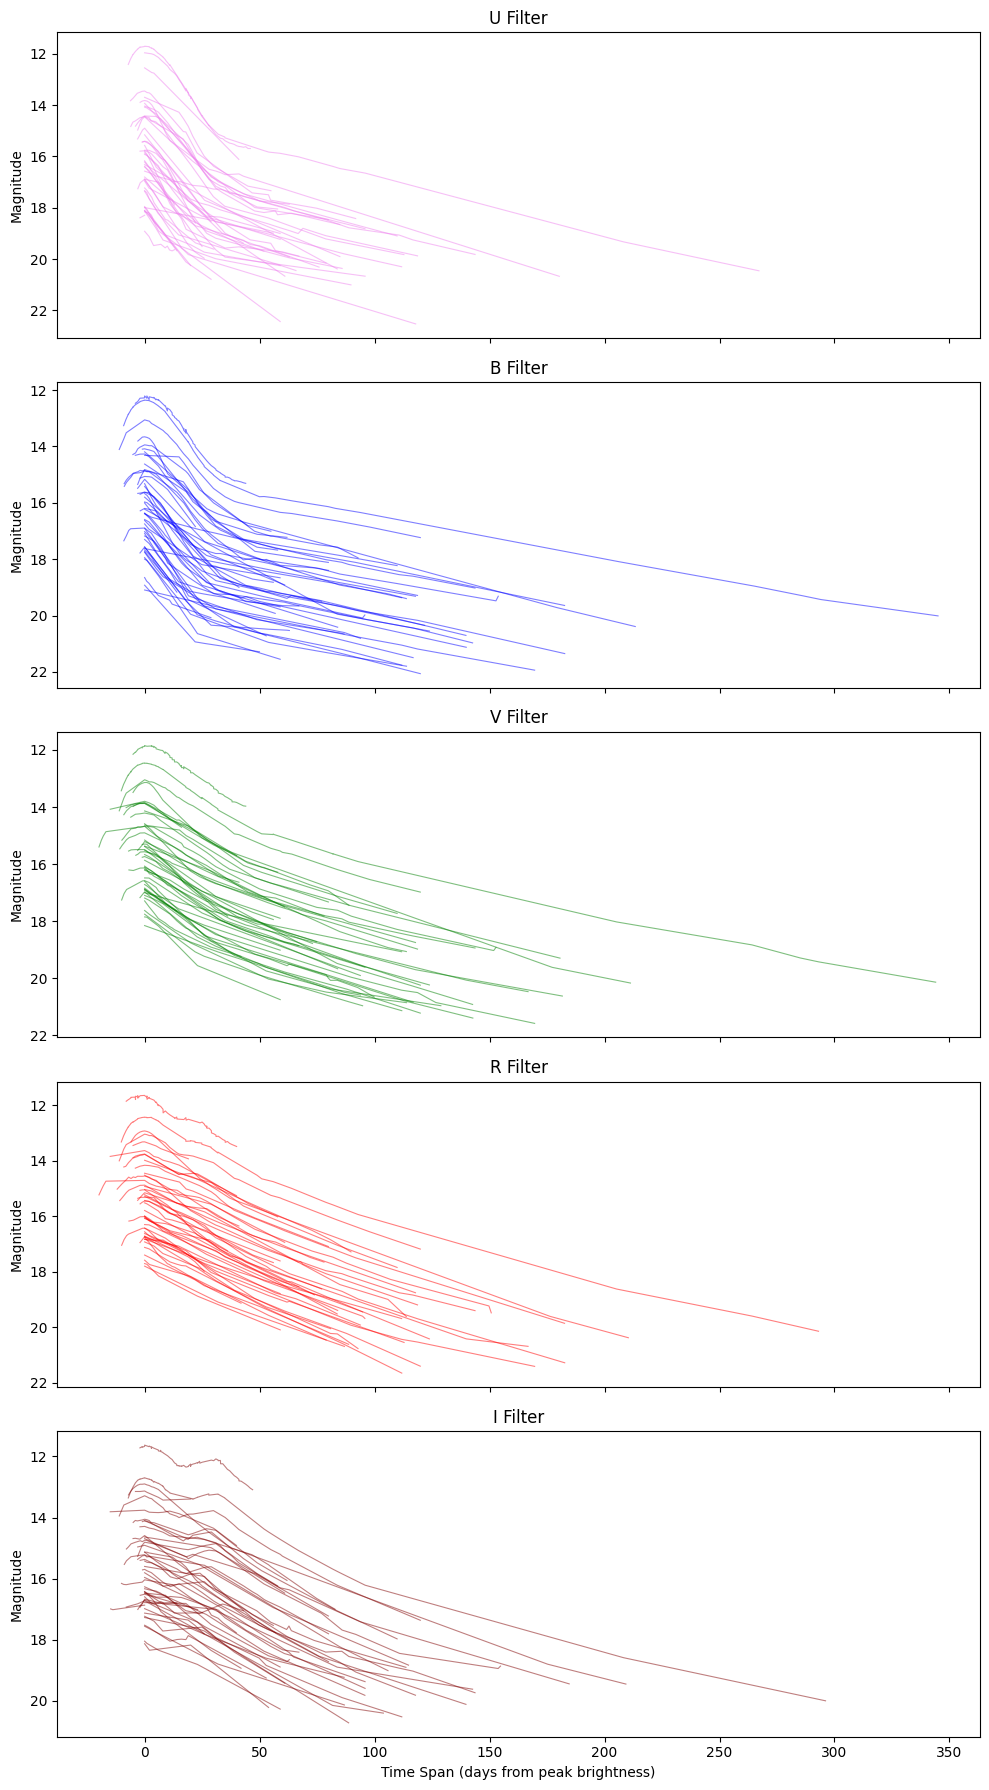

In [159]:
# Initialize dictionaries to store data for each filter, with each supernova as a separate entry
all_filters_data = {
    "U": [],
    "B": [],
    "V": [],
    "R": [],
    "I": []
}

# Loop through each file and extract data for each filter, storing each supernova separately
for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0,
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")

        # Loop through each filter and adjust the time span to start at peak brightness
        for filter in ["U", "B", "V", "R", "I"]:
            # Drop NaN values to avoid issues with finding the minimum
            filter_data = df[['HJD', filter]].dropna()

            # Check if data exists for this filter
            if not filter_data.empty:
                # Find the time (HJD) of peak brightness (minimum magnitude)
                peak_time = filter_data.loc[filter_data[filter].idxmin(), "HJD"]

                # Calculate the time span relative to the peak brightness
                adjusted_time_span = filter_data["HJD"] - peak_time

                # Store the adjusted time span and magnitudes for this supernova
                all_filters_data[filter].append({
                    "Time_Span": adjusted_time_span.values,
                    "Mag": filter_data[filter].values
                })
    
    except Exception as e:
        print(f"{file} ignored due to error: {e}")

# Set up colors for each filter
filter_colors = {
    "U": "violet",
    "B": "blue",
    "V": "green",
    "R": "red",
    "I": "#800000"
}

# Create a subplot for each filter
fig, axs = plt.subplots(5, 1, figsize=(10, 18), sharex=True)  # 5 rows, 1 column of subplots

# Plot each filter in its respective subplot, with separate lines for each supernova
for i, filter in enumerate(["U", "B", "V", "R", "I"]):
    for supernova in all_filters_data[filter]:
        # Plot each supernova's data as a line
        axs[i].plot(supernova["Time_Span"], supernova["Mag"], color=filter_colors[filter], alpha=0.5, linewidth=0.8)
    axs[i].set_ylabel("Magnitude")
    axs[i].set_title(f"{filter} Filter")
    axs[i].invert_yaxis()  # Optional: invert y-axis for magnitude

# Set common x-label
axs[-1].set_xlabel("Time Span (days from peak brightness)")

# Adjust layout
plt.tight_layout()
plt.show()


We can see that the brightness of every SNe is decreasing over time. However, there are some interesting patterns where in some curves the brightness peaks again after a few days, especially in the I filter. This could be because of an attribute of SNe Type IIb that show this characteristic of two peaks in their lightcurve.

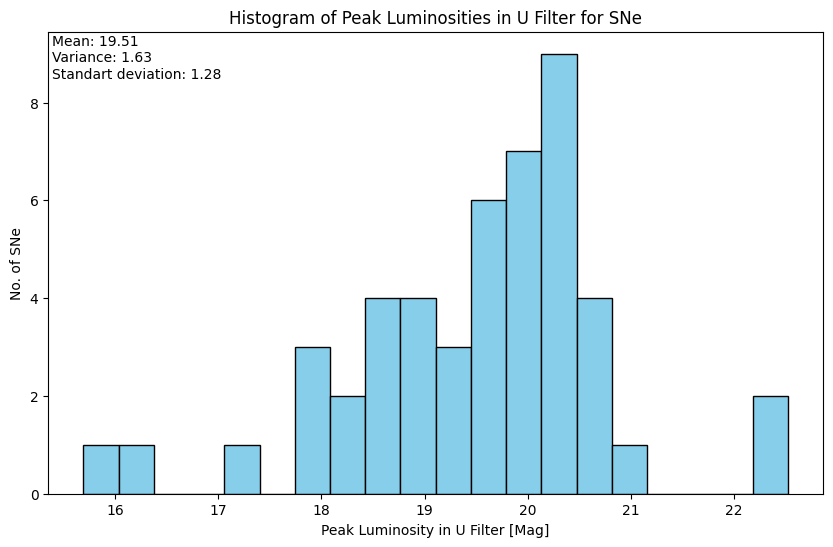

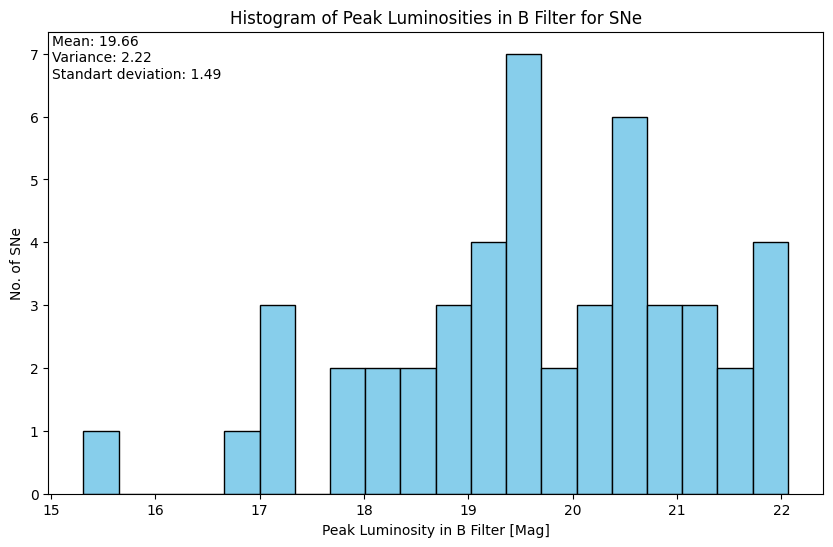

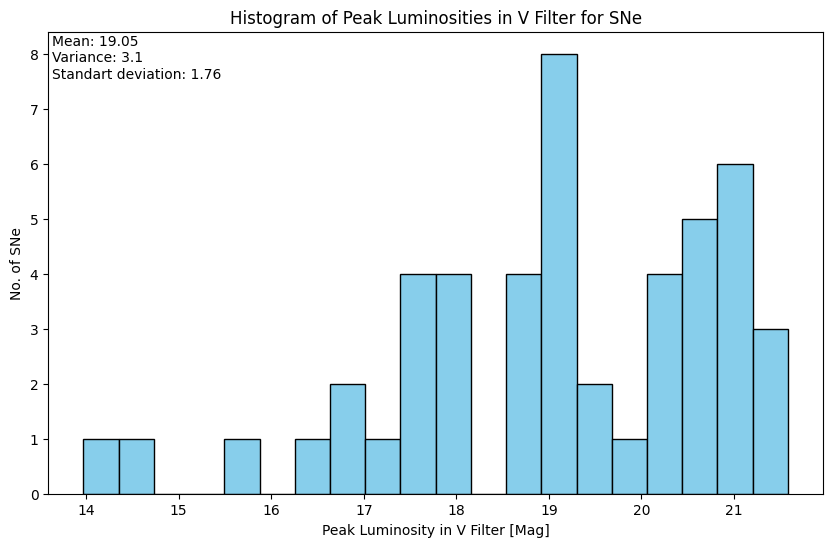

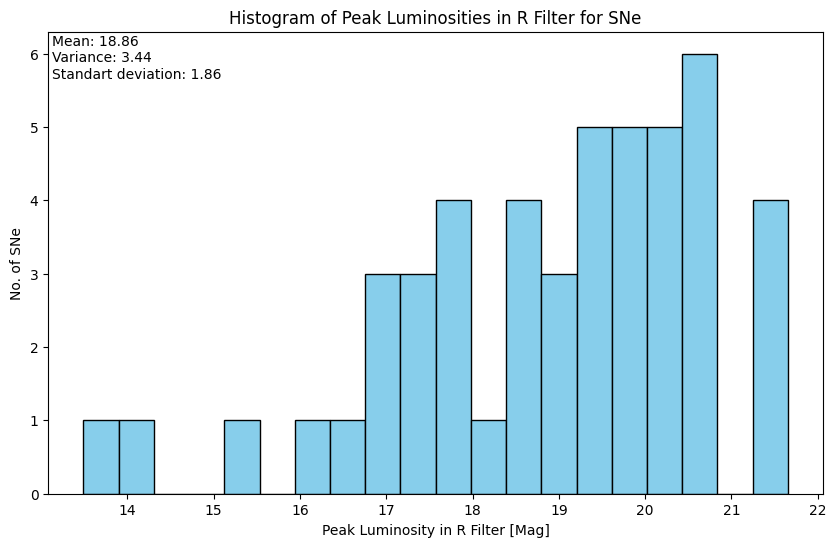

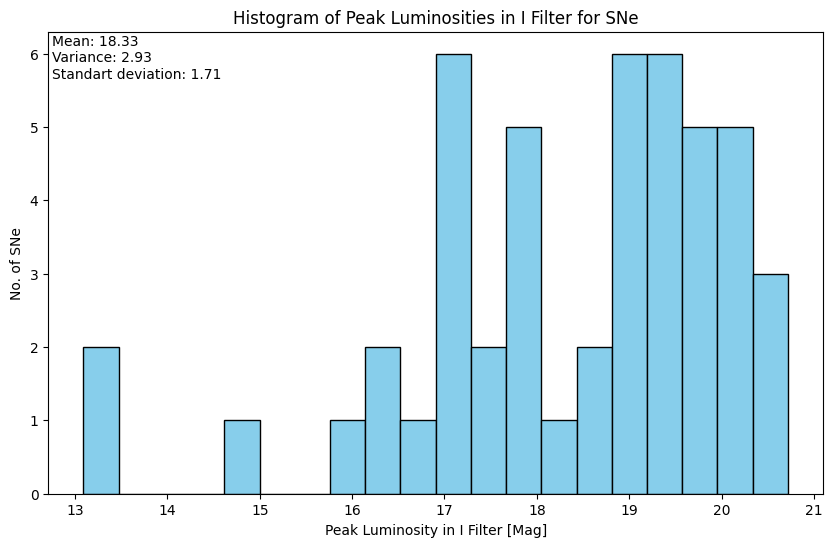

In [160]:
import numpy as np

u_list = []
b_list = []
v_list = []
r_list = []
i_list = []
filters = [["U",u_list], ["B",b_list], ["V",v_list], ["R",r_list], ["I",i_list]]


for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, 
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        for f,d in filters:
            peak_lum = df[f].max()
            d.append(peak_lum)
        
        
    except Exception as e:
        #print(f"{file} ignored due to error: {e}")
        pass


for f,d in filters:
    mean_lum = round(np.mean(d), 2)
    var_lum = round(np.var(d), 2)
    std_lum = round(np.std(d), 2)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(d, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'Peak Luminosity in {f} Filter [Mag]')
    plt.ylabel('No. of SNe')
    plt.title(f'Histogram of Peak Luminosities in {f} Filter for SNe')
    plt.text(0.005 , 0.9 , f'Mean: {mean_lum} \nVariance: {var_lum} \nStandart deviation: {std_lum}', 
             transform=plt.gca().transAxes )
    plt.show()

At last we made a histogram for peak luminosities of all SNe lightcurves. However, we can't really do much with this information. As we have every type of SNe in the data and each of them has a different characteristic lightcurve, we cannot compare them to each other without knowing the type of SN. Another problem is, that this is only the apparent magnitude and it depends on how far away the SN is to find out the absolute magnitude.

## 3 Statistical Inference
Acknowledging the problem with the types of SNe, we conduct our further analysation with a data set only consisting of Type Ia SNe.
Firstly, with the so called Phillips Relation we can determine the absolute magnitude of a SNe Ia depending on its decline in brightness in the B filter after 15 days.

In [161]:
from sympy import symbols, Eq, init_printing
from scipy.interpolate import CubicSpline


Mags_Delm15 = []

file_path = "Supernova_Ia/table4.dat"

def phillips_relation(delta_m_15):
    M_max_B = -21.726 + 2.698*delta_m_15
    return M_max_B

init_printing()
M, delta_m_15 = symbols('M_{max}(B) Δm_{15}(B)')
phillips_eq = Eq(M, - 21.726 + ( 2.698 * delta_m_15 ))


# Read the file into a pandas DataFrame
columns = ["prefix", "SN", "JD", "U_mag", "U_err", "B_mag", "B_err", "V_mag", "V_err", "R_mag", "R_err", "I_mag", "I_err", "Source"]
df = pd.read_csv(file_path, comment="#", sep="[ \t]+", engine="python", header=0,
                 names=columns)

# filter out unneeded magnitudes as the phillips relation is in B mag (U_mag because if NaN values occur everything gets shifted to the left)
UB_filter = df[["SN", "JD", "U_mag", "U_err", "B_mag", "B_err"]].dropna()

# get rid of the U mag too
B_filter = UB_filter[["SN", "JD", "B_mag", "B_err"]]

unique_sne = B_filter["SN"].unique()

# group the different SNe
sn_group = B_filter.groupby("SN")


for sn in unique_sne:
    try:
        sn_data = B_filter[B_filter["SN"] == sn] # creates mini df for each SN

        # Find time of maximum brightness and corresponding magnitude
        start_idx = sn_data["JD"].idxmin() # Index of first item of specific SN 
        max_idx = sn_data["B_mag"].idxmin() # Index of maximum brightness
        max_idx = max_idx - start_idx #index correction, df -> sn df index
        max_day = float(sn_data["JD"].iat[max_idx]) # Date of maximum brightness 
        m_b_max = float(sn_data["B_mag"].iat[max_idx]) # Max brightness
        max_day15 = max_day + 15 # Date 15 days after maximum
        closest_index = (sn_data["JD"] - max_day15).abs().idxmin() # Index of closest day with a measurement around the 15th day
        closest_index = closest_index - start_idx
        closest_day = sn_data["JD"].iat[closest_index] # Date of 15th/closeest day
        
        
        if abs(closest_day - max_day15) < 3:
            m_b_15 = float(sn_data["B_mag"].iat[closest_index]) # Mag on 15th/closest day
        else:
            jd_known = sn_data["JD"].values
            mag_known = sn_data["B_mag"].values
            spl = CubicSpline(jd_known,mag_known)
            m_b_15 = spl(max_day15) # Interpolate an approximate value for mag on 15th day

        # Calculate ∆m15
        delta_m15 = m_b_15 - m_b_max
        print("SN", sn)
        print("max apparent B_mag:", m_b_max)
        M_B = phillips_relation(delta_m15) 
        print("Absolute mag:", M_B, "mag")

        # distance to the supernova
        mu = m_b_max - M_B
        distance_pc = 10 ** ((mu + 5) / 5)
        distance_mpc = distance_pc/(10**6)
        print("distance:", distance_mpc, "Mpc")

        if M_B > (-22):
            Mags_Delm15.append((M_B, m_b_max, delta_m15, distance_mpc)) #max abs, max obs, del m 15, dist [Mpc]
        else:
            print('Outlier skipped')

        print()

    except Exception as oops:
        print(f"{sn} ignored due to error: {oops}")



# Creates numpy array out of list for plotting/ data analysis
data_array = np.array(Mags_Delm15)

max_abs_mag = data_array[:,0]
max_obs_mag = data_array[:,1]
del_m = data_array[:,2]
dist = data_array[:,3]



SN 1997E
max apparent B_mag: 15.62
Absolute mag: -16.974821999999996 mag
distance: 33.03424610850272 Mpc

SN 1997Y
max apparent B_mag: 15.379
Absolute mag: -24.407578572416806 mag
distance: 906.3912711676822 Mpc
Outlier skipped

SN 1997bp
max apparent B_mag: 14.085
Absolute mag: -18.62903863736893 mag
distance: 34.898577694447276 Mpc

SN 1997bq
max apparent B_mag: 14.824
Absolute mag: -20.563162 mag
distance: 119.51774761403583 Mpc

SN 1997br
max apparent B_mag: 14.317
Absolute mag: -21.580308 mag
distance: 151.1686031279803 Mpc

SN 1997cn
max apparent B_mag: 18.062
Absolute mag: -28.960341546896714 mag
distance: 25378.637903961244 Mpc
Outlier skipped

SN 1997cw
max apparent B_mag: 16.892
Absolute mag: -17.289226887852088 mag
distance: 68.58756386101247 Mpc

SN 1997dg
max apparent B_mag: 17.178
Absolute mag: -19.38596548394279 mag
distance: 205.4911377793112 Mpc

SN 1997do
max apparent B_mag: 14.626
Absolute mag: -21.329393999999997 mag
distance: 155.26687063645178 Mpc

SN 1997dt
max a

### Combined quantity data plot

This is a scatterplot showing the relationship between the maximum observed magnitude of the Supernova and the difference in magnitude between the peak brightness and the brightness of the SN 15 days after the peak.

We can observe that most SNe get around 0.5 - 2 magnitude dimmer within 15 days

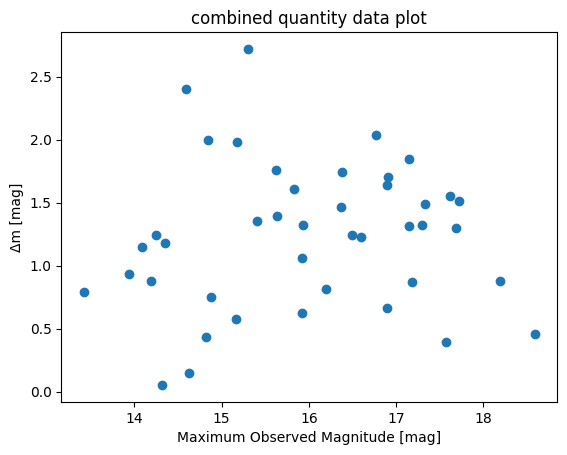

In [162]:
plt.scatter(max_obs_mag, del_m)
#plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Δm [mag]')
plt.title('combined quantity data plot')

plt.show()

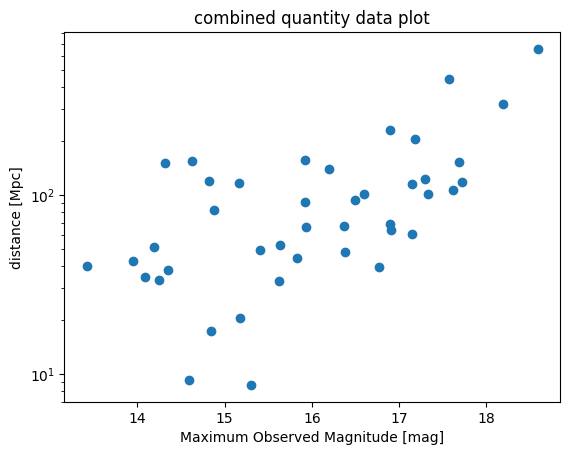

In [163]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

### Maximum Absolute Magnitude vs Δm (The Phillips Relation)

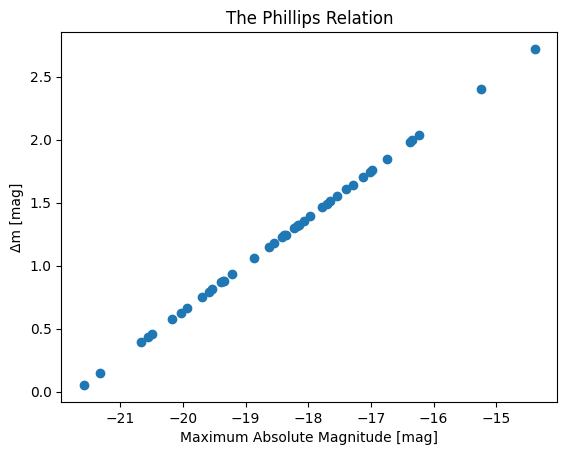

In [164]:
plt.scatter(max_abs_mag, del_m)
plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('Δm [mag]')
plt.title('The Phillips Relation')

plt.show()



Here we have a perfect linear correlation between the decline rate $\Delta m$ and the absolute magnitude of the SNe. However, this is just because we already assumed this so called Phillips relation and calculated the absolute magnitudes with a linear dependance on $\Delta m$ which means that this graph does not give us additional insights.

### Maximum Absolute Magnitude of a type Ia Supernova

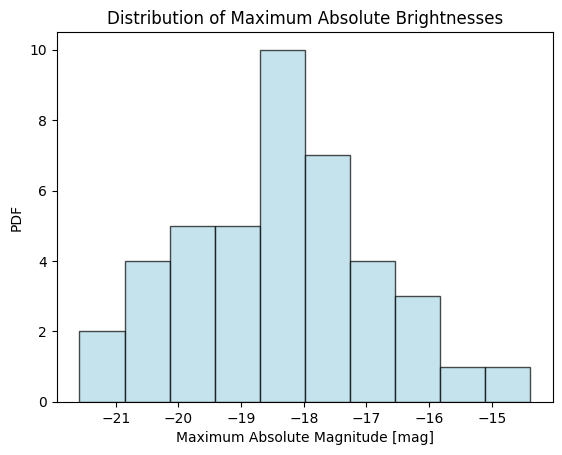

In [165]:
plt.hist(max_abs_mag, bins=10, edgecolor='black',color = 'lightblue', alpha=0.7)

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Distribution of Maximum Absolute Brightnesses')

plt.show()



### Analysing the distribution of Maximum Absolute Magnitudes 

Mean =  -18.402138193410643
Standard deviation =  1.559003484573776
1-sigma Confidence Interval: (-19.96114167798442, -16.843134708836867)


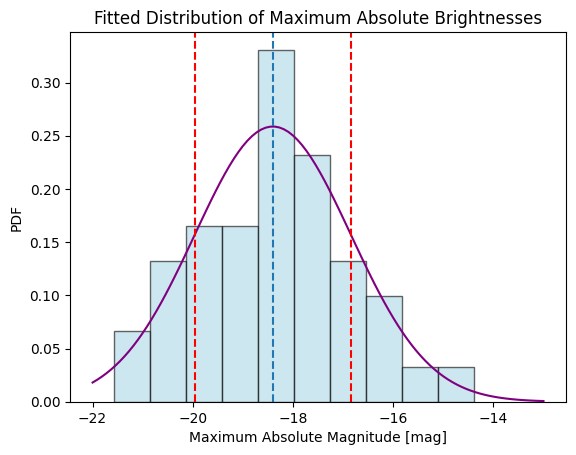

In [166]:
from scipy.optimize import curve_fit

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-22,-13,100)

# fit the data and plot the result
param, cov = curve_fit(gaussian, bins,counts, p0=[1, np.mean(max_abs_mag), np.std(max_abs_mag)])
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)

# access fit parameters
mean_gaus = param[1] #mean of gaussian dist
std_gaus   = param[2] #stdev of the dist

print('Mean = ', mean_gaus)
print('Standard deviation = ', std_gaus)
print(f"1-sigma Confidence Interval: ({mean_gaus-std_gaus}, {mean_gaus+std_gaus})")

plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(mean_gaus - std_gaus, color = 'red', linestyle = 'dashed')
plt.axvline(mean_gaus + std_gaus, color = 'red', linestyle = 'dashed')

plt.show()

The

2.5-sigma Confidence Interval: (-22.30, -14.50)


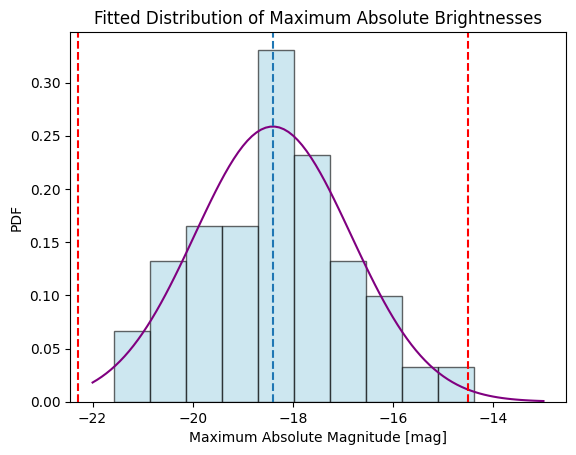

In [167]:
def n_sigma_confidence_interval(sigma, mu, n):
    # Calculate the confidence interval
    lower_bound = mu - n * sigma
    upper_bound = mu + n * sigma
    
    return lower_bound, upper_bound


n = 2.5

lower, upper = n_sigma_confidence_interval(std_gaus, mean_gaus, n)

print(f"{n}-sigma Confidence Interval: ({lower:.2f}, {upper:.2f})")


# Fitted histogram plotting

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)


plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(lower, color = 'red', linestyle = 'dashed')
plt.axvline(upper, color = 'red', linestyle = 'dashed')

plt.show()

## 4. Hypothesis Testing

In this subsection we will discuss the combined quantity data plot "Distance in Mpc vs the Maximum Observed Brightness". Let's define our combined quantity as X:=(10^m)/d
As a refresher, here is the plot:

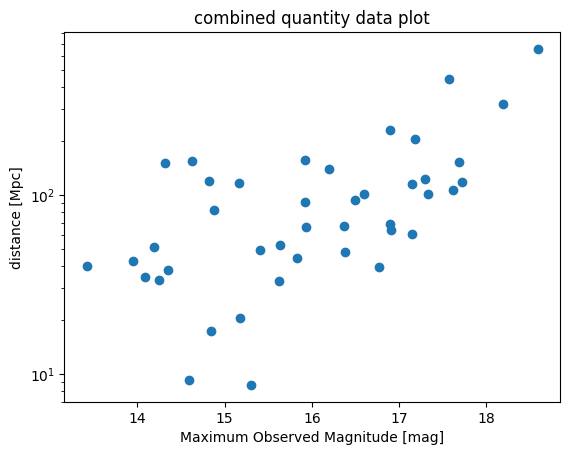

In [168]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

We expected a stronger correlation between these two measurements, since we want to use Type Ia supernovae to determine the distance to far away galaxies. We would like to find out if the spread of the data is statistically significant.

H_0: The value of X can be considered constant for all SNe Ia

H_a: The value of X can NOT be considered constant for all SNe Ia

Let's choose a subset and test this hypothesis. 
Let the subset be SNe within 100 MPc of the sun.

In [169]:
sub_data = data_array[data_array[:, 3] <= 100]
print(sub_data)

#max abs mag   max obs mag    del m     distance

[[-16.974822    15.62         1.761       33.03424611]
 [-18.62903864  14.085        1.147873    34.89857769]
 [-17.28922689  16.892        1.64446742  68.58756386]
 [-18.06689716  15.402        1.35622789  49.40597011]
 [-18.871516    15.917        1.058       90.7200331 ]
 [-17.009896    16.384        1.748       47.72865543]
 [-14.384742    15.307        2.721        8.6765765 ]
 [-18.16394326  15.93         1.32025824  65.88531889]
 [-19.35505096  14.193        0.87878022  51.24012624]
 [-18.3618666   16.494        1.24689896  93.57790531]
 [-16.34348088  14.843        1.99500338  17.27015266]
 [-19.211464    13.945        0.932       42.78512449]
 [-16.227476    16.765        2.038       39.67301441]
 [-19.694406    14.876        0.753       82.05049397]
 [-18.37851141  14.253        1.24072965  33.59713792]
 [-17.11846382  16.907        1.70775989  63.83998315]
 [-18.54789516  14.354        1.17794842  38.05213524]
 [-15.23642389  14.594        2.40532843   9.24878699]
 [-17.3934

In [170]:
#calculate X

X_sub = np.divide(np.power(10,sub_data[:,1]),sub_data[:,3])
X_data = np.divide(np.power(10,data_array[:,1]),data_array[:,3])
#print(X_sub)
#print(X_data)

Now that we calculated X=(10^m)/d for both the subset and the entire dataset, let's plot a histogram.

Entire data set stats:
 Mean:  906176715507192.4 
 Standard deviation 1458590402960090.2
Subset data stats:
 Mean:  352306690962450.0 
 Standard deviation 585037638848078.9


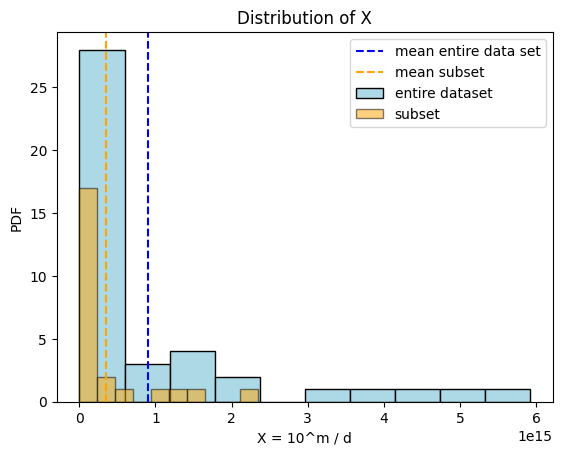

In [171]:
plt.hist(X_data, bins=10, edgecolor = 'black', color = 'lightblue', alpha=1)
plt.hist(X_sub, bins=10, edgecolor = 'black', color = 'orange', alpha=0.5)

mean_X_data = np.mean(X_data)
mean_X_sub = np.mean(X_sub)
std_X_data = np.std(X_data)
std_X_sub = np.std(X_sub)
print('Entire data set stats:\n Mean: ', mean_X_data, '\n Standard deviation', std_X_data)
print('Subset data stats:\n Mean: ', mean_X_sub, '\n Standard deviation', std_X_sub)

plt.axvline(mean_X_data, color = 'blue', linestyle = 'dashed')
plt.axvline(mean_X_sub, color = 'orange', linestyle = 'dashed')
plt.xlabel('X = 10^m / d')
plt.ylabel('PDF')
plt.title('Distribution of X')
plt.legend(['mean entire data set', 'mean subset', 'entire dataset', 'subset'], loc = "upper right")

plt.show()

In [172]:
from scipy.stats import ttest_ind

n = len(X_sub)
t = abs(mean_X_sub - mean_X_data) / (std_X_sub / np.sqrt(n))
print('t = ', t)
t_stat, p_val = ttest_ind(X_data, X_sub)
print('t statistic = ', t_stat)
print('p value = ', p_val)

t =  4.637988580114988
t statistic =  1.7530750756502262
p value =  0.0843776396134172


Let's test out hypothesis with 5% significance level.

In [173]:
if (p_val < 0.05):
    print('We can reject H_0')
else:
    print('We can not reject H_0')

We can not reject H_0


H_0: The value of X can be considered constant for all SNe Ia

H_a: The value of X can NOT be considered constant for all SNe Ia

Since we can not reject H_0 this means that the ratio between the observed magnitude and the distance to a supernova is a constant and does not vary significantly. This is a good result for us, because this means that Type Ia SNe have indeed a constant peak brightness. Therefore we can use these cosmic events to determine distances.

### Absolute Magnitude
Another thing we can test is, if the value of -19.3 mag for SNe Ia you often find in literature is significantly different to our calculated values.

In [174]:
from scipy.stats import ttest_1samp

def hypothesis_test(sample_mean, sample_std, data, hypothesized_mean=-19.3, alpha=0.05):
    
    sample_size = len(data)

    # Perform a one-sample t-test
    t_stat, p_value = ttest_1samp(data, hypothesized_mean)

    # Print the results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"Sample Size: {sample_size}")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Interval: ({sample_mean-1.96*sample_std/np.sqrt(sample_size)},{sample_mean+1.96*sample_std/np.sqrt(sample_size)})")

    # Decision rule
    if p_value < alpha:
        print(f"Result: Reject the null hypothesis (H₀), The mean is significantly different from {hypothesized_mean}.")
    else:
        print(f"Fail to reject the null hypothesis (H₀): The mean is not significantly different from {hypothesized_mean}.")
    

    
hypothesis_test(mean_gaus, std_gaus, max_abs_mag)


Sample Mean: -18.40
Sample Standard Deviation: 1.56
Sample Size: 42
T-Statistic: 3.72
P-Value: 0.0006
Interval: (-18.873634735544368,-17.93064165127692)
Result: Reject the null hypothesis (H₀), The mean is significantly different from -19.3.


The hypothesis test suggests that we should reject $H_0$ and the theoretical value of -19.3 is wrong. As we don't expect to disprove well known scientific results here, something has to be wrong. Either with our data and the SNe are all on the fainter side and produce a biased mean or the Phillips Relation is not right.

## 5. Linear Regression
For the last part we again looked if there is a linear correlation between observed magnitudes and distances. Our Problem again is that we only have the distances calculated from the Phillips Relation which we cannot compare to check if they are right.

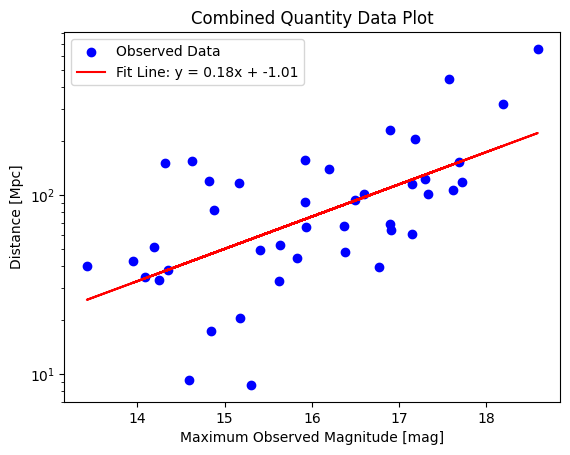

Error:0.03782601786688617


In [175]:
from scipy.stats import linregress

# Perform linear regression (on a log scale for the distances)
log_dist = np.log10(dist)  # Convert distances to log10 scale
slope, intercept, r_value, p_value, std_err = linregress(max_obs_mag, log_dist)

# Generate the best-fit line
fit_line = slope * np.array(max_obs_mag) + intercept

# Convert the fit line back to the original scale
fit_line_exp = 10**fit_line

# Plot the scatter points
plt.scatter(max_obs_mag, dist, label='Observed Data', color='blue')

# Plot the fitted line
plt.plot(max_obs_mag, fit_line_exp, label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}', color='red')

# Set logarithmic scale for the y-axis
plt.semilogy()

# Add labels and title
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Distance [Mpc]')
plt.title('Combined Quantity Data Plot')
plt.legend()

# Show the plot
plt.show()

print(f"Error:{std_err}")


This line tries to fit log distance to magnitudes (because mag is logarithmic). The idea behind this is that if SNe Ia have a somewhat constant peak luminosity it should get brighter and dimmer also with a somewhat constant dependency on the distance. 
The line fits our dataset as good as it can but it is still difficult to justify this relation.

Calculating some values which give information about the correlation:

In [176]:
from scipy.stats import pearsonr


mean_dist = np.mean(log_dist)
mean_obs_mag = np.mean(max_obs_mag) 
n = len(log_dist)

cov_xy = np.sum((max_obs_mag - mean_obs_mag) * (log_dist - mean_dist)) / (n - 1)

coeff, p_val = pearsonr(max_obs_mag, log_dist)

print(f"Covaraince = {cov_xy}")
print(f'Pearson Coefficient = {coeff}')

Covaraince = 0.3103081285600104
Pearson Coefficient = 0.6020304908319192


A positive covariance indicates that when x increases, y tends to increase as well.

A positive Pearson Coefficient indicates that we have a positive slope, which is indeed the case for our data (see plot). A value of approximately 0.6 indicates that we have a moderate correlation between our data points, but the correlation isn't very strong. 

Bootstrap 1-sigma interval for the slope: (0.1419, 0.2177)
removing 1590 lowest and highest estimates
Mean slope: 0.1792


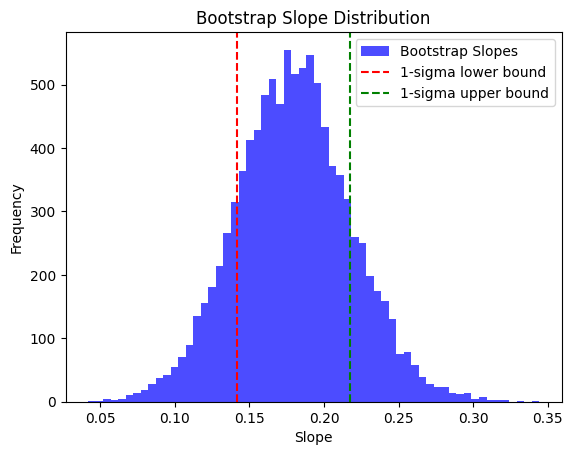

In [177]:
import random
#Number of bootstrap samples
n_bootstrap = 10000
N= len(max_obs_mag)


# Store bootstrap slopes
bootstrap_slopes = []


# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample data with replacement
    indices = np.random.randint(0, N, N) 

    resampled_mag = max_obs_mag[indices]
    resampled_log_dist = log_dist[indices]
    
    # Fit linear regression to the resampled data
    coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
    slope = coefficients[0]
    
    # Store the slope
    bootstrap_slopes.append(slope)


bootstrap_slopes = np.sort(bootstrap_slopes)

# Compute the 1-sigma interval (16th and 84th percentiles)
lower_bound = np.percentile(bootstrap_slopes, 16)
upper_bound = np.percentile(bootstrap_slopes, 84)

# Print results
print(f"Bootstrap 1-sigma interval for the slope: ({lower_bound:.4f}, {upper_bound:.4f})")

alpha= 0.318
remove= int(n_bootstrap*alpha/2)
print(f"removing {remove} lowest and highest estimates")
cut= bootstrap_slopes[remove:-remove]
print(f"Mean slope: {np.mean(cut):.4f}")

# Plot the distribution of bootstrap slopes
plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes')
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')
plt.legend()
plt.show()


With the bootstrap method we get a distribution of possible slopes and a confidence interval of around (0.14, 0.22) for the gradient of the slope.

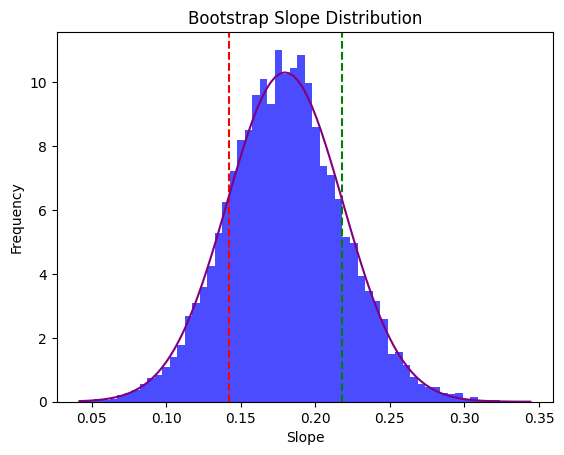

In [178]:
from scipy.stats import norm

plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')

# fit a gaussian distribution
x = np.linspace(min(bootstrap_slopes),max(bootstrap_slopes),100)
pdf= norm.pdf(x,np.mean(bootstrap_slopes),np.std(bootstrap_slopes))

plt.plot(x, pdf, 'purple')

plt.show()

And at last you can of course fit a gaussian distribution around it.

## References

1. UBVRI light curves of 44 type Ia supernovae (2006), Jha S. , Kirshner R.P., Challis P. et.al
2. Type Ia Supernova Explosions in Binary Systems: A Review (2023), Zheng-Wei Liu, Friedrich K. Röpke, Zhanwen Han